### Predicting the CDR - The Clinical Dementia Rating. Higher the number, higher the chances of dementia

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("OASIS4_data_CDR.csv")

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

# Your plotting code here

plt.show()  # Display the plot in the Jupyter Notebook output


In [5]:
# # Import the necessary module
# from ydata_profiling import ProfileReport

# # Create a ProfileReport object
# report = ProfileReport(df)

# # Generate the data profiling report
# report.to_file('oasis_4_report.html')

In [6]:
#print number of rows and columns
print(df.shape)

(1158, 11)


In [7]:
# impute the missing values of columns 3 onwards with the mean of the respective columns, excpet column 'cdr'
df.iloc[:,2:-1] = df.iloc[:,2:-1].fillna(df.iloc[:,2:-1].mean())

In [8]:
df.isnull().sum()

oasis_id       0
cdr_id         0
visit_days     0
memory         0
orient         0
judgement      0
community      0
homehobb       0
perscare       0
sumbox         0
cdr           10
dtype: int64

In [9]:
# remove the null values from 'cdr'
df = df.dropna()

In [10]:
# check all the columns in df and convert all the int columns to float, except 'cdr'
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1157
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   oasis_id    1148 non-null   object 
 1   cdr_id      1148 non-null   object 
 2   visit_days  1148 non-null   float64
 3   memory      1148 non-null   float64
 4   orient      1148 non-null   float64
 5   judgement   1148 non-null   float64
 6   community   1148 non-null   float64
 7   homehobb    1148 non-null   float64
 8   perscare    1148 non-null   float64
 9   sumbox      1148 non-null   float64
 10  cdr         1148 non-null   float64
dtypes: float64(9), object(2)
memory usage: 107.6+ KB


In [12]:
df = df.drop(['oasis_id', 'cdr_id'], axis=1)

#### Encoding

In [13]:
# convert contents of 'cdr' column to string
df['cdr'] = df['cdr'].astype('str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1157
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   visit_days  1148 non-null   float64
 1   memory      1148 non-null   float64
 2   orient      1148 non-null   float64
 3   judgement   1148 non-null   float64
 4   community   1148 non-null   float64
 5   homehobb    1148 non-null   float64
 6   perscare    1148 non-null   float64
 7   sumbox      1148 non-null   float64
 8   cdr         1148 non-null   object 
dtypes: float64(8), object(1)
memory usage: 89.7+ KB


In [15]:
# print count of each type of values 'cdr'
print(df['cdr'].value_counts())

0.5    654
1.0    294
0.0    102
2.0     96
3.0      2
Name: cdr, dtype: int64


In [16]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['cdr'] = le.fit_transform(df['cdr'])

In [17]:
print(df['cdr'])

0       0.5
1       0.5
2       0.5
3       0.5
4       0.5
       ... 
1153    0.5
1154    0.5
1155    0.5
1156    0.5
1157    0.5
Name: cdr, Length: 1148, dtype: object


#### Splitting into Train and Test

In [18]:
# split into x and y where y is 'Group' 
x = df.drop(columns=['cdr'])
y = df['cdr']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42, stratify=y)

#### Standad Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_subset = x_train.iloc[:, 2:]
x_train_scaled = scaler.fit_transform(x_train_subset)
x_train.iloc[:, 2:] = x_train_scaled

x_test_subset = x_test.iloc[:, 2:]
x_test_scaled = scaler.transform(x_test_subset)
x_test.iloc[:, 2:] = x_test_scaled


#### Model Training

##### Linear Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# log = {'model': 'Logistic Regression', 'accuracy': accuracy}
# csv_logger.log(log)

Accuracy: 0.94
Confusion Matrix:
[[ 18   3   0   0]
 [  0 130   0   1]
 [  0   7  51   1]
 [  0   2   0  17]]


C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Logistic Regression after smote

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Perform SMOTE with reduced k_neighbors
smote = SMOTE(sampling_strategy='auto', k_neighbors=1)  # Adjust k_neighbors as needed
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(x_resampled, y_resampled)

# Make predictions and evaluate
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# log = {'model': 'Logistic Regression with SMOTE', 'accuracy': accuracy}
# csv_logger.log(log)

Accuracy: 0.88
Confusion Matrix:
[[ 21   0   0   0   0]
 [ 13 113   4   1   0]
 [  0   4  53   2   0]
 [  0   2   0  16   1]
 [  0   0   0   0   0]]


C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### SVM

In [22]:
# svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Perform SMOTE with reduced k_neighbors
smote = SMOTE(sampling_strategy='auto', k_neighbors=1)  # Adjust k_neighbors as needed
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train the model
model = SVC(kernel='linear', random_state=42)
model.fit(x_resampled, y_resampled)

# Make predictions and evaluate
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# log = {'model': 'SVM with SMOTE', 'accuracy': accuracy}
# csv_logger.log(log)

##### RF

Accuracy: 0.94


C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true

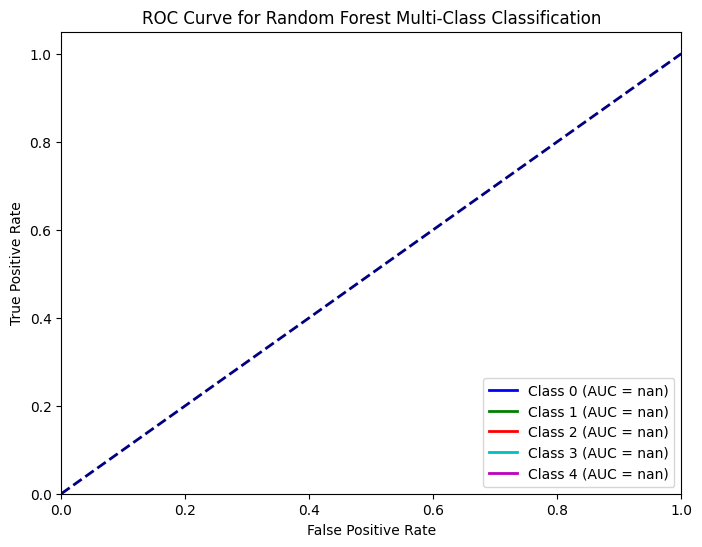

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# log = {'model': 'Random Forest', 'accuracy': accuracy}
# csv_logger.log(log)

##### Xg boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)
# log = {'model': 'XGBoost', 'accuracy': mse}
# csv_logger.log(log)


0.02613133953822179


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# split into x and y where y is 'Group' 

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# log = {'model': 'Gradient Boost', 'accuracy': accuracy}
# csv_logger.log(log)

Accuracy: 0.94


In [ ]:
# import csv
# import os
# class CSVLogger:
#     def __init__(self, filename, fieldnames):
#         self.filename = filename
#         self.fieldnames = fieldnames

#         # Create and initialize the CSV file
#         if not os.path.isfile(self.filename):
#             with open(self.filename, 'w', newline='') as csvfile:
#                 writer = csv.DictWriter(csvfile, fieldnames=self.fieldnames)
#                 writer.writeheader()
#         else:
#             with open(self.filename, 'a', newline='') as csvfile:
#                 writer = csv.DictWriter(csvfile, fieldnames=self.fieldnames)
#                 writer.writerow({})

#     def log(self, data):
#         # Append data to the CSV file
#         with open(self.filename, 'a', newline='') as csvfile:
#             writer = csv.DictWriter(csvfile, fieldnames=self.fieldnames)
#             writer.writerow(data)

In [ ]:
# create a CSVLogger object
csv_logger = CSVLogger( 'results.csv', ['model', 'accuracy'] )
